In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 0 2 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[146. 135. 139.]
  [166. 155. 159.]
  [160. 149. 153.]
  ...
  [135. 123. 127.]
  [102.  90.  94.]
  [116. 104. 108.]]

 [[142. 131. 135.]
  [153. 142. 146.]
  [151. 140. 144.]
  ...
  [124. 112. 116.]
  [113. 101. 105.]
  [113. 101. 105.]]

 [[145. 134. 138.]
  [144. 133. 137.]
  [147. 136. 140.]
  ...
  [117. 105. 109.]
  [123. 111. 115.]
  [108.  96. 100.]]

 ...

 [[161. 150. 154.]
  [158. 147. 151.]
  [158. 147. 151.]
  ...
  [125. 111. 111.]
  [133. 119. 119.]
  [120. 106. 106.]]

 [[160. 149. 153.]
  [159. 148. 152.]
  [161. 150. 154.]
  ...
  [123. 109. 109.]
  [127. 113. 113.]
  [120. 106. 106.]]

 [[160. 149. 153.]
  [162. 151. 155.]
  [167. 156. 160.]
  ...
  [100.  86.  86.]
  [142. 128. 128.]
  [130. 116. 116.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[186. 175. 179.]
  [181. 170. 174.]
  [180. 169. 173.]
  ...
  [142. 127. 132.]
  [136. 121. 126.]
  [148. 133. 138.]]

 [[194. 183. 187.]
  [189. 178. 182.]
  [185. 174. 178.]
  ...
  [153. 138. 143.]
  [144. 129. 134.]
  [191. 176. 181.]]

 [[185. 174. 178.]
  [182. 171. 175.]
  [181. 170. 174.]
  ...
  [163. 148. 153.]
  [167. 152. 157.]
  [153. 138. 143.]]

 ...

 [[185. 176. 179.]
  [184. 175. 178.]
  [183. 174. 177.]
  ...
  [145. 133. 133.]
  [181. 169. 169.]
  [134. 122. 122.]]

 [[191. 182. 185.]
  [187. 178. 181.]
  [182. 173. 176.]
  ...
  [138. 126. 126.]
  [179. 167. 167.]
  [162. 150. 150.]]

 [[187. 178. 181.]
  [182. 173. 176.]
  [177. 168. 171.]
  ...
  [135. 123. 123.]
  [129. 117. 117.]
  [166. 154. 154.]]]


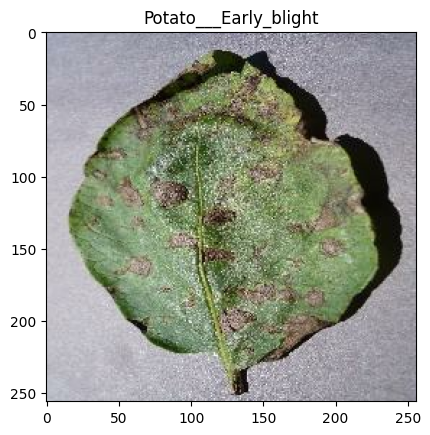

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_name[label_batch[0]])

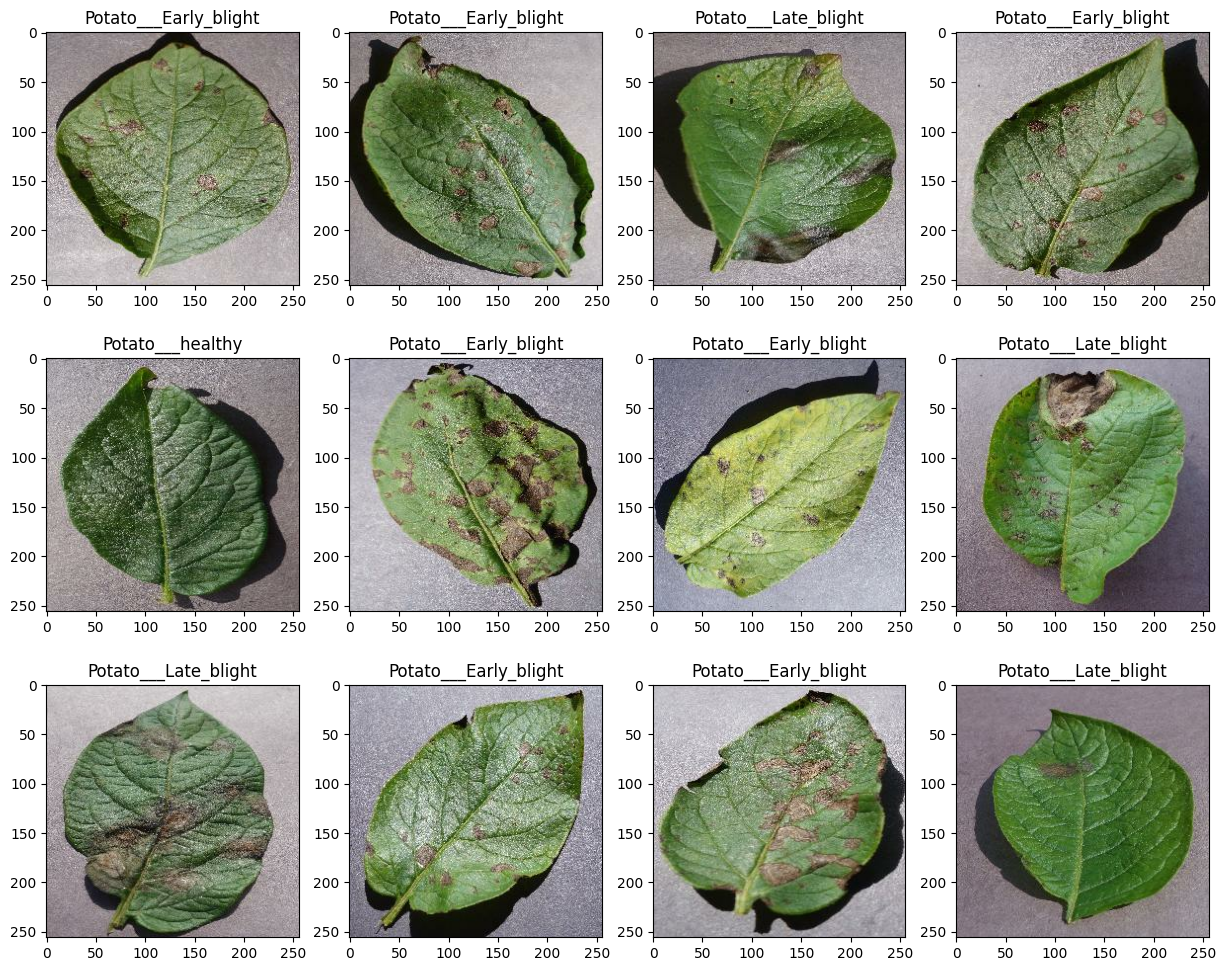

In [10]:
plt.figure(figsize=(15, 12))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])

In [11]:
len(dataset)

68

In [12]:
# 80% ===> Training
# 20% ===> 10% Validation 10% Test

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [16]:
val_ds = test_ds.take(7)
test_ds = test_ds.skip(7)

In [17]:
def get_dataset_partition(ds, train_split=0.8, val_split = 0.1, test_split=0.1, shuffle = True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [19]:
print('Training Size :', len(train_ds))
print('Validation Size :', len(val_ds))
print('Testing Size :', len(test_ds))

Training Size : 54
Validation Size : 6
Testing Size : 8


In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [23]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
# Creating Convolution layer 
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'softmax'),

])


model.build(input_shape = input_shape)


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
# Optimizing the model 'SparseCategoricalCrossentropy'=>as there are many categorical classes of data
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'])

In [27]:
#Fit the model with training data and also pass validation data
history = model.fit(
train_ds, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = 1, validation_data = val_ds)

Epoch 1/50
54/54 [==============================] - 31s 548ms/step - loss: 1.4225 - accuracy: 0.4838 - val_loss: 0.9273 - val_accuracy: 0.5833
Epoch 2/50
54/54 [==============================] - 28s 527ms/step - loss: 0.8293 - accuracy: 0.6053 - val_loss: 0.7528 - val_accuracy: 0.7188
Epoch 3/50
54/54 [==============================] - 28s 512ms/step - loss: 0.6396 - accuracy: 0.7431 - val_loss: 0.6197 - val_accuracy: 0.7396
Epoch 4/50
54/54 [==============================] - 28s 511ms/step - loss: 0.4802 - accuracy: 0.8119 - val_loss: 0.4932 - val_accuracy: 0.7917
Epoch 5/50
54/54 [==============================] - 28s 520ms/step - loss: 0.3805 - accuracy: 0.8438 - val_loss: 0.4349 - val_accuracy: 0.8125
Epoch 6/50
54/54 [==============================] - 28s 512ms/step - loss: 0.2945 - accuracy: 0.8825 - val_loss: 0.4506 - val_accuracy: 0.8021
Epoch 7/50
54/54 [==============================] - 28s 514ms/step - loss: 0.2451 - accuracy: 0.8987 - val_loss: 0.3920 - val_accuracy: 0.8333

In [28]:
scores = model.evaluate(train_ds)

54/54 [==============================] - 7s 125ms/step - loss: 0.1612 - accuracy: 0.9468


In [29]:
scores

[0.1612011045217514, 0.9467592835426331]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

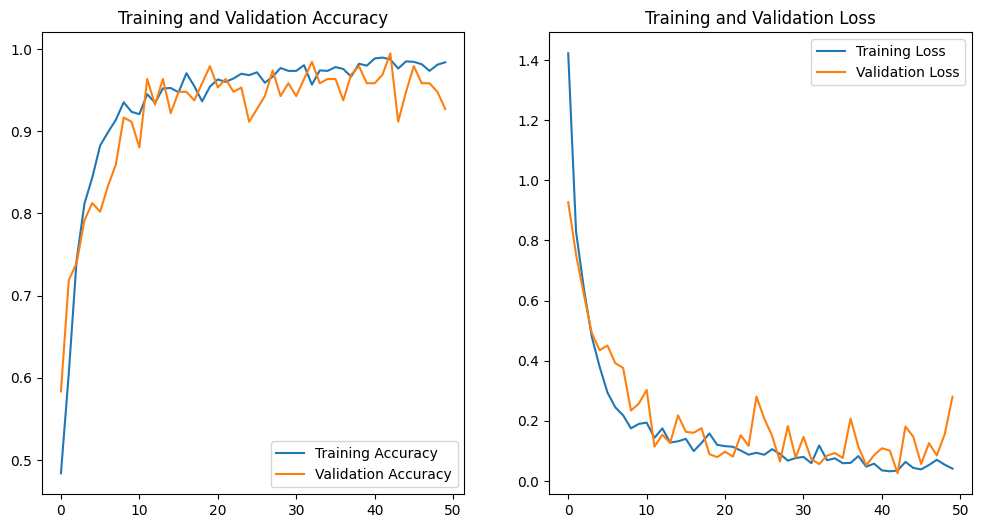

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 216ms/step
predicted label: Potato___Early_blight


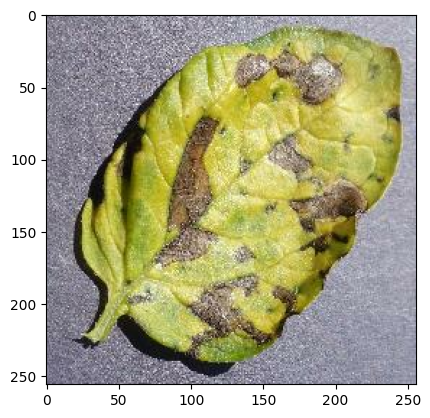

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


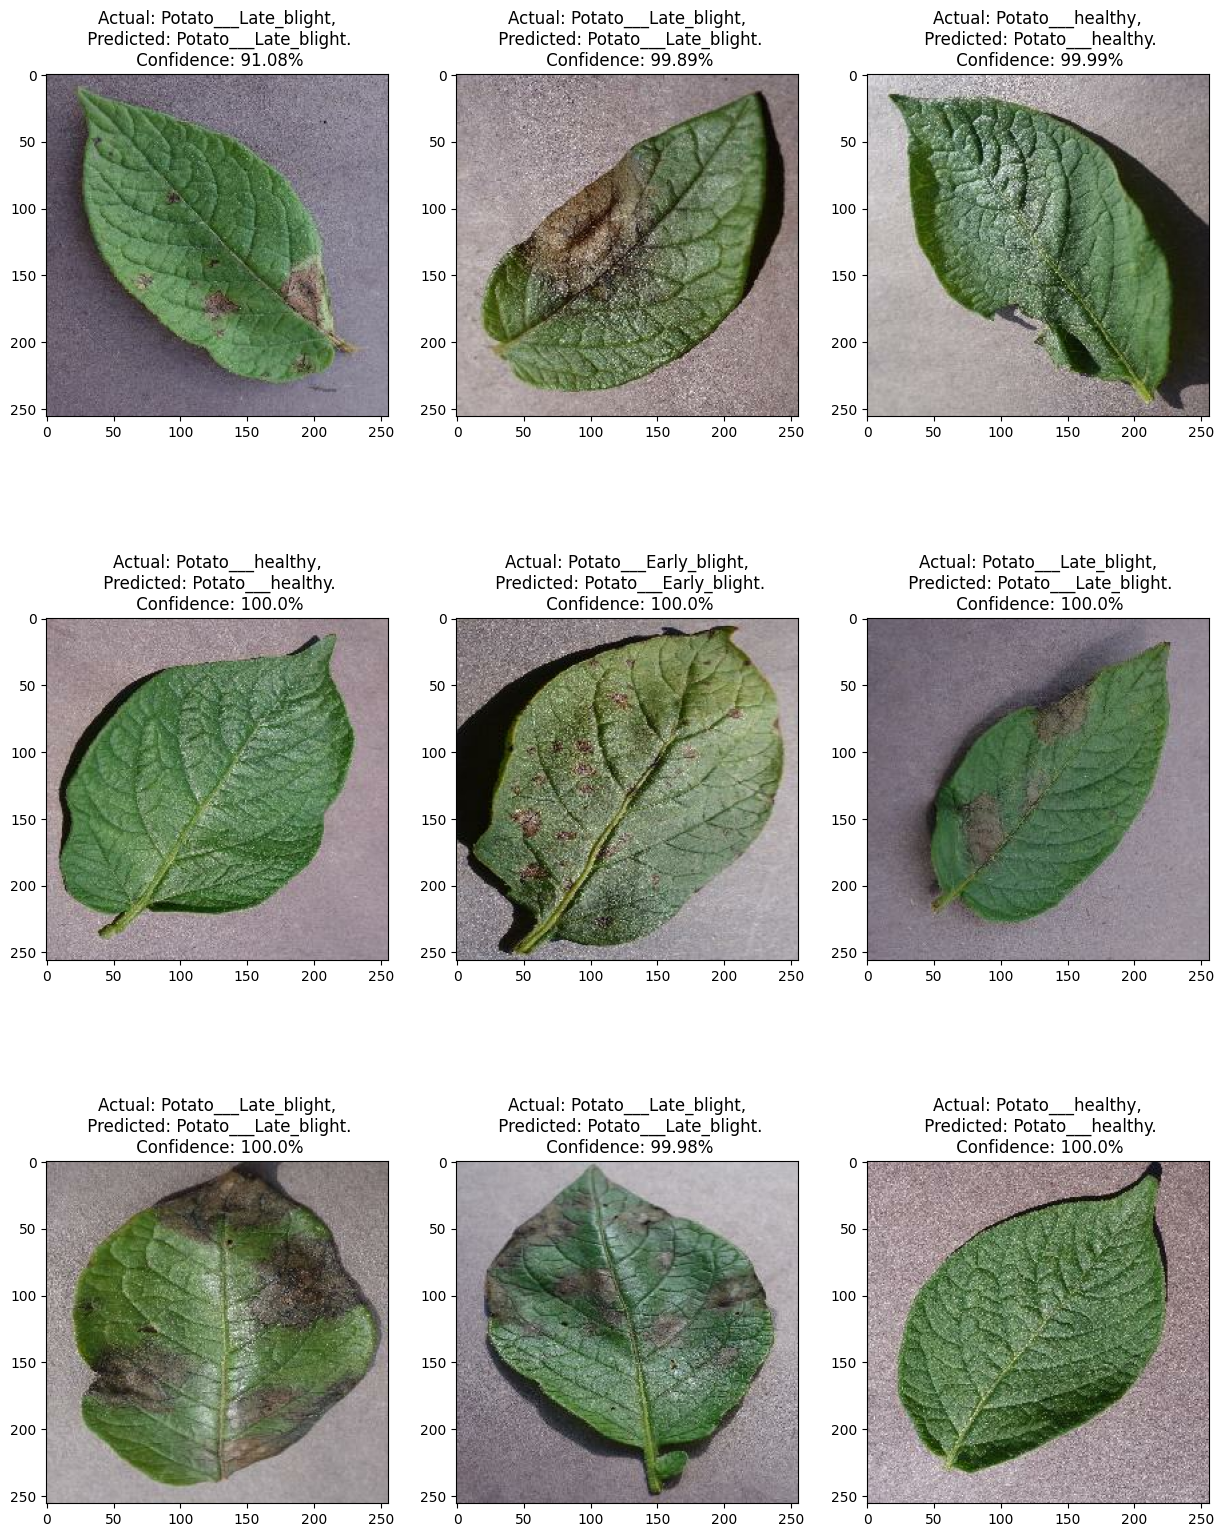

In [37]:
plt.figure(figsize=(15, 20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")